In [1]:
import cv2
import matplotlib.pyplot as plt

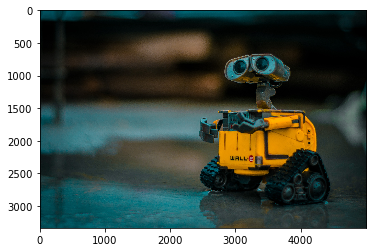

In [2]:
img1 = cv2.imread('./data/lenin-estrada-OI1ToozsKBw-unsplash.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1);

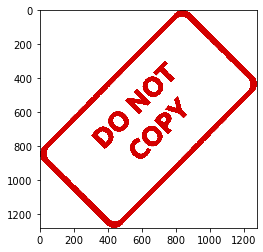

In [3]:
img2 = cv2.imread('./data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2);

In [4]:
img1.shape, img2.shape

((3333, 5000, 3), (1280, 1277, 3))

In [5]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape, img2.shape

((3333, 5000, 3), (3333, 5000, 3))

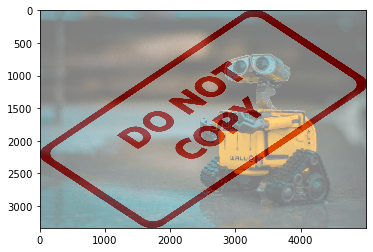

In [6]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

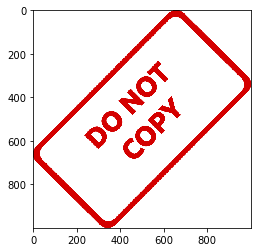

In [7]:
img2 = cv2.resize(img2, (1000, 1000))
plt.imshow(img2)

In [8]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

In [9]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

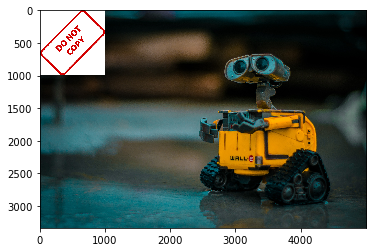

In [10]:
plt.imshow(large_img);

In [52]:
img1 = cv2.imread('./data/lenin-estrada-OI1ToozsKBw-unsplash.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.flip(img1, 1)
img2 = cv2.imread('./data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (3000, 3000))

In [53]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

x_offset, y_offset

(2000, 333)

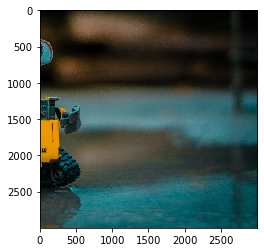

In [54]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi);

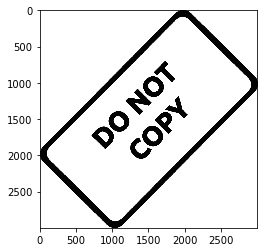

In [55]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap='gray');

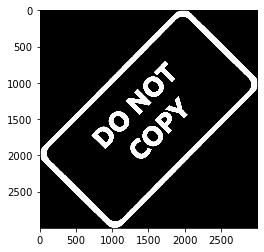

In [56]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray');

In [57]:
mask_inv.shape

(3000, 3000)

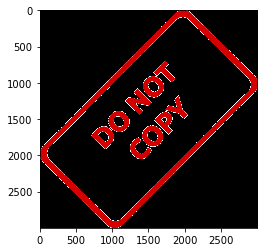

In [58]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

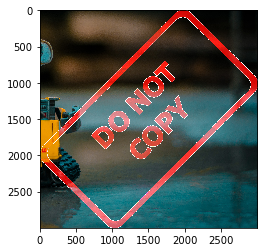

In [59]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

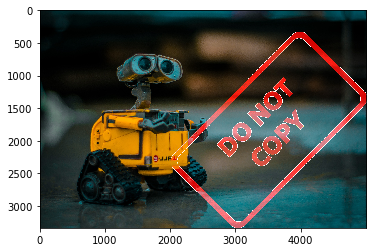

In [60]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1);

In [61]:
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
cv2.imwrite('./data/add_watermark.png', img1)

True

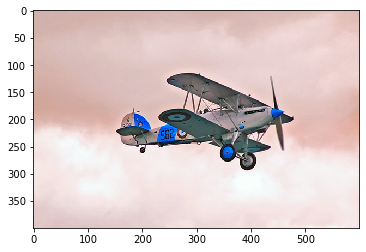

In [39]:
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
plt.imshow(src);

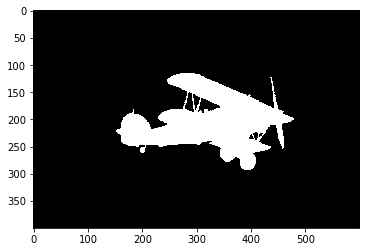

In [40]:
mask = cv2.imread('./data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray')

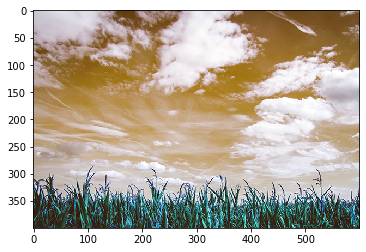

In [41]:
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)
plt.imshow(dst);

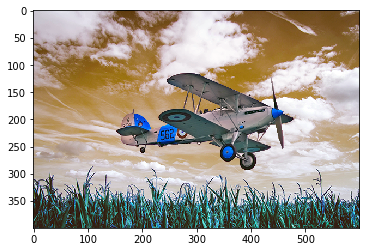

In [42]:
plt.imshow(cv2.copyTo(src, mask, dst));